In [1]:
## Interactive magics - comment out if running from another script
%matplotlib notebook
%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from app.process import get_cleaned_processed_df
from app.evaluation import get_training_and_validation_df, complete_columns, drop_text_features

from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interactive, fixed

sns.set(style="darkgrid", palette="muted")
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

In [34]:
def plot_2d_tsne(df, y, file_name, preprocess=False):
    if preprocess:
        from app.preprocess import ColumnSumFilter, ColumnStdFilter
        ppl = Pipeline([
            ('clmn_std_filter', ColumnStdFilter(min_std=10)),
            ('clmn_sum_filter', ColumnSumFilter(min_sum=10000))
        ])
        df = ppl.transform(df)

    from app.preprocess import get_text_feature_names
    for c in get_text_feature_names(df):
        df = df.drop(c, axis=1)
    df.fillna(0, inplace=True)
    
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(df)
    df_transformed = pd.DataFrame(data=X_tsne)
    df_transformed = df_transformed.join(y)
    pl = sns.pairplot(df_transformed, x_vars=df_transformed.columns[0],
                      y_vars=df_transformed.columns[1], size=12, hue=y.name)
    pl.savefig(file_name, format='pdf', dpi=900)
    return pl

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1412
[t-SNE] Computed conditional probabilities for sample 1412 / 1412
[t-SNE] Mean sigma: 21.308717
[t-SNE] Iteration 25: error = 1.1883062, gradient norm = 0.0078600
[t-SNE] Iteration 50: error = 1.0188620, gradient norm = 0.0072805
[t-SNE] Iteration 75: error = 0.6496116, gradient norm = 0.0053048
[t-SNE] Iteration 100: error = 0.6033183, gradient norm = 0.0056665
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.603318
[t-SNE] Iteration 125: error = 0.5451242, gradient norm = 0.0053926
[t-SNE] Iteration 150: error = 0.5229567, gradient norm = 0.0048898
[t-SNE] Iteration 175: error = 0.5250711, gradient norm = 0.0048675
[t-SNE] Iteration 200: error = 0.5208849, gradient norm = 0.0051752
[t-SNE] Iteration 225: error = 0.5370752, gradient norm = 0.0042365
[t-SNE] Iteration 250: error = 0.5282194, gradient norm = 0.0052369
[

<IPython.core.display.Javascript object>


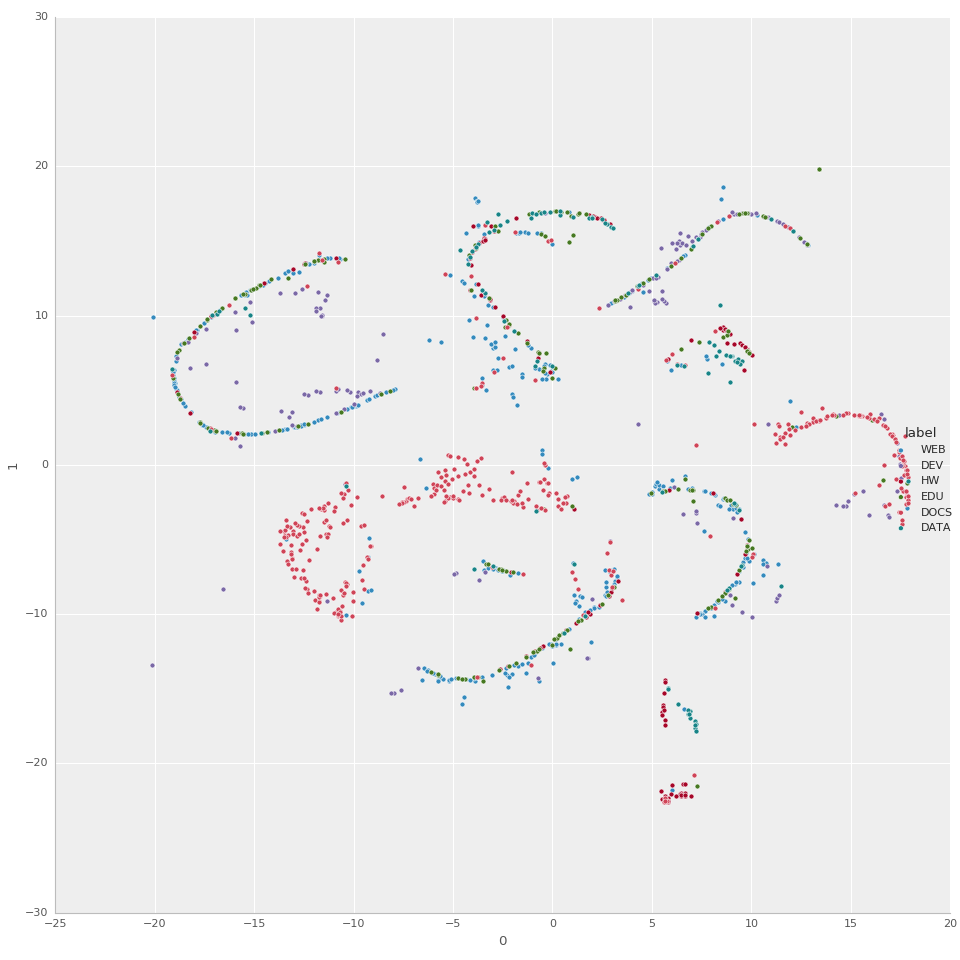

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1412
[t-SNE] Computed conditional probabilities for sample 1412 / 1412
[t-SNE] Mean sigma: 36.074332
[t-SNE] Iteration 25: error = 1.1204669, gradient norm = 0.0077848
[t-SNE] Iteration 50: error = 0.9651855, gradient norm = 0.0072729
[t-SNE] Iteration 75: error = 0.6081624, gradient norm = 0.0051024
[t-SNE] Iteration 100: error = 0.5684687, gradient norm = 0.0047847
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.568469
[t-SNE] Iteration 125: error = 0.5019491, gradient norm = 0.0037901
[t-SNE] Iteration 150: error = 0.4908308, gradient norm = 0.0041967
[t-SNE] Iteration 175: error = 0.4902395, gradient norm = 0.0040543
[t-SNE] Iteration 200: error = 0.4862803, gradient norm = 0.0041176
[t-SNE] Iteration 225: error = 0.4973867, gradient norm = 0.0043171
[t-SNE] Iteration 250: error = 0.4897022, gradient norm = 0.0043676
[

<IPython.core.display.Javascript object>


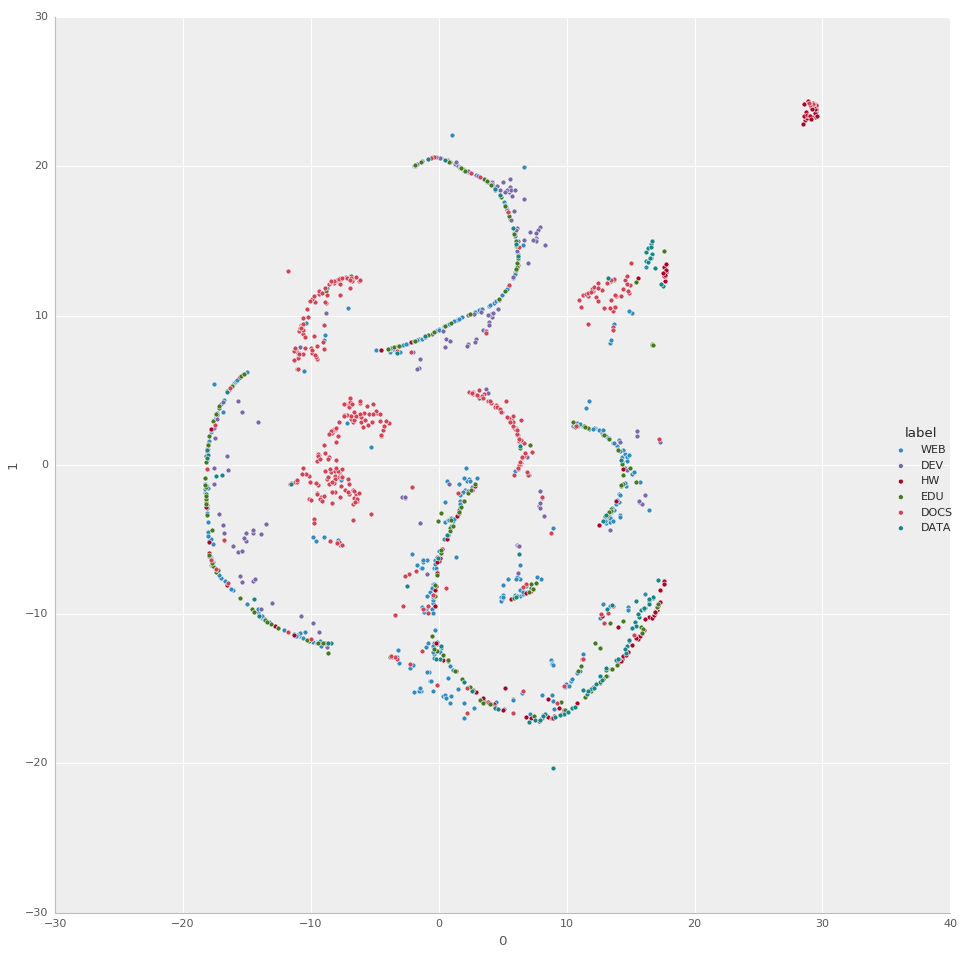

In [35]:
#Plot the class distribution in the training set
df = get_cleaned_processed_df()
y = df["label"]
plot_2d_tsne(df, y, "raw_class_distribution.pdf")
plot_2d_tsne(df, y, "preprocessed_class_distribution.pdf", preprocess=True)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1443
[t-SNE] Computed conditional probabilities for sample 1443 / 1443
[t-SNE] Mean sigma: 21.036028
[t-SNE] Iteration 25: error = 1.1917002, gradient norm = 0.0080572
[t-SNE] Iteration 50: error = 1.0351442, gradient norm = 0.0063943
[t-SNE] Iteration 75: error = 0.6754385, gradient norm = 0.0057341
[t-SNE] Iteration 100: error = 0.6336838, gradient norm = 0.0049707
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.633684
[t-SNE] Iteration 125: error = 0.5670831, gradient norm = 0.0045357
[t-SNE] Iteration 150: error = 0.5566189, gradient norm = 0.0045477
[t-SNE] Iteration 175: error = 0.5465804, gradient norm = 0.0048214
[t-SNE] Iteration 200: error = 0.5475245, gradient norm = 0.0053543
[t-SNE] Iteration 225: error = 0.5474443, gradient norm = 0.0049401
[t-SNE] Iteration 225: did not make any progress during the last 30 e

<IPython.core.display.Javascript object>


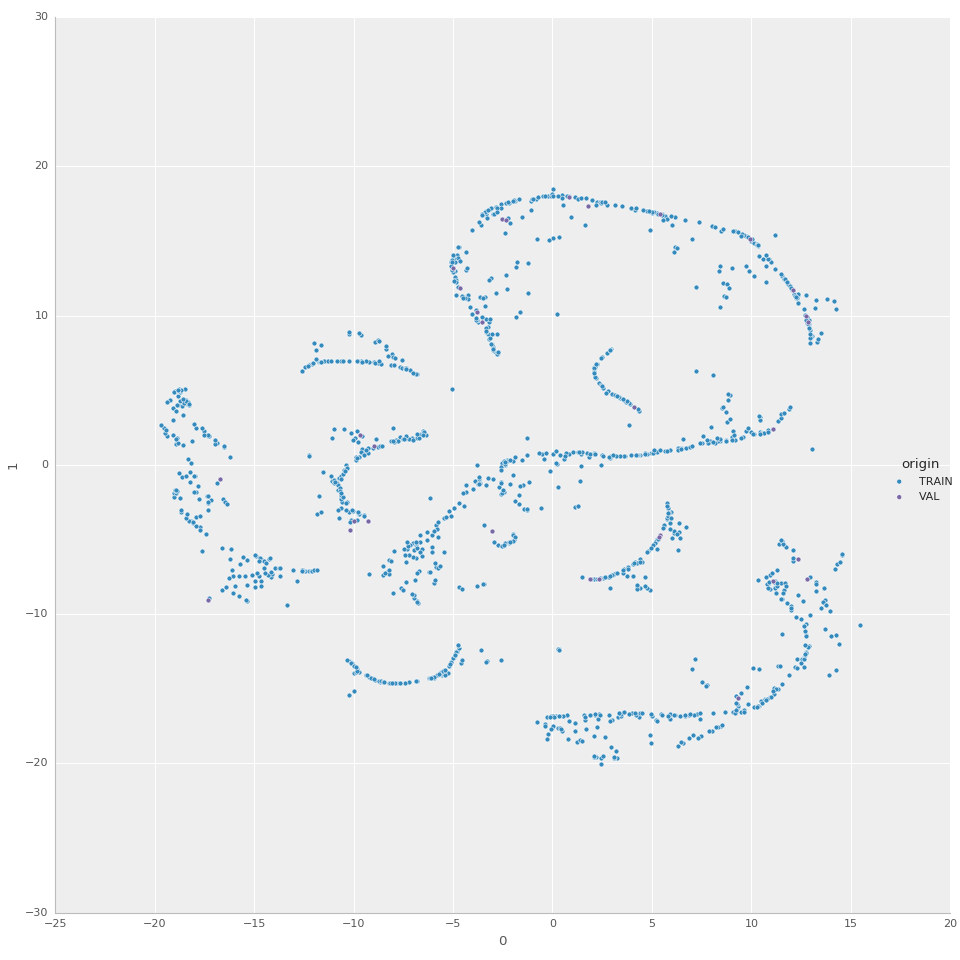

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1443
[t-SNE] Computed conditional probabilities for sample 1443 / 1443
[t-SNE] Mean sigma: 36.059741
[t-SNE] Iteration 25: error = 1.1627482, gradient norm = 0.0068838
[t-SNE] Iteration 50: error = 1.0086461, gradient norm = 0.0064618
[t-SNE] Iteration 75: error = 0.6286659, gradient norm = 0.0055574
[t-SNE] Iteration 100: error = 0.5872852, gradient norm = 0.0062733
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.587285
[t-SNE] Iteration 125: error = 0.5304140, gradient norm = 0.0045849
[t-SNE] Iteration 150: error = 0.5132101, gradient norm = 0.0039917
[t-SNE] Iteration 175: error = 0.5176370, gradient norm = 0.0033760
[t-SNE] Iteration 200: error = 0.5163658, gradient norm = 0.0036390
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 0.587285


<IPython.core.display.Javascript object>


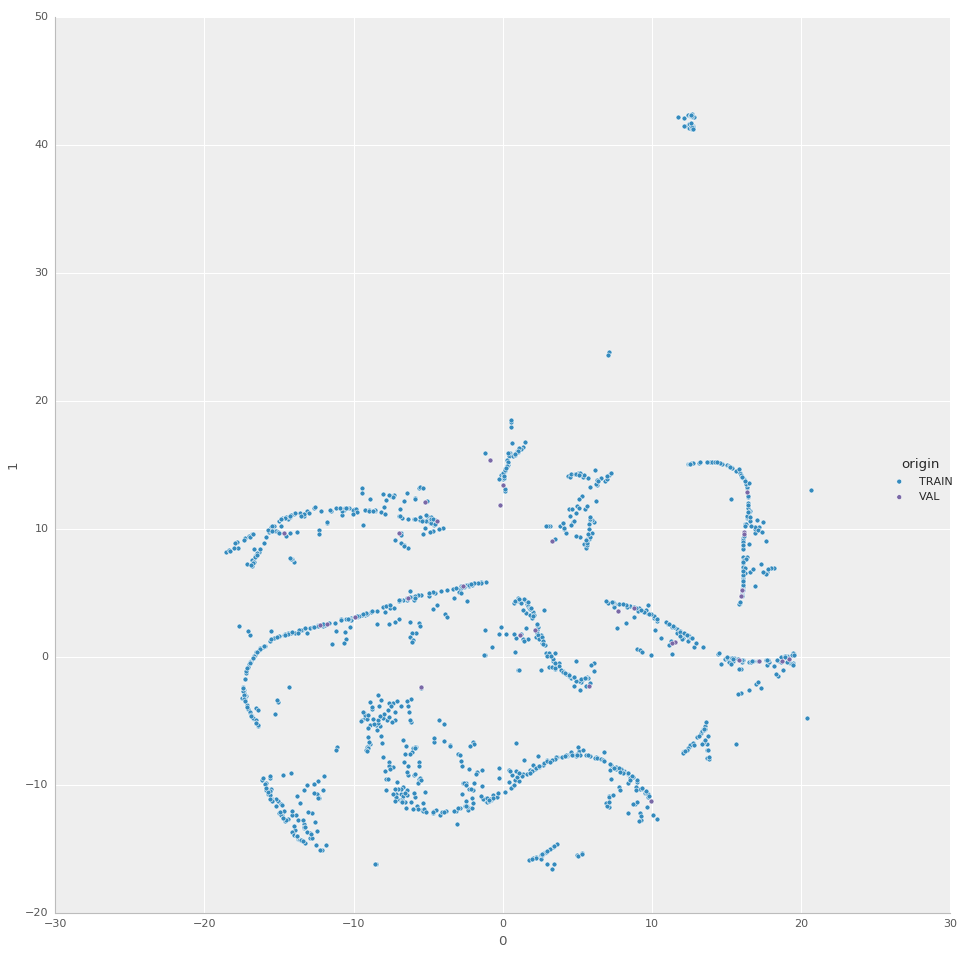

In [36]:
# Plot the similarity between the training and the validation set
df = get_cleaned_processed_df()
val_df = pd.DataFrame.from_csv("data/validation_data.csv")
df["origin"] = "TRAIN"
val_df["origin"] = "VAL"
df, val_df = complete_columns(df, val_df)
df = df.append(val_df)
y = df["origin"]

plot_2d_tsne(df, y, "raw_validation_data_similarity.pdf")
plot_2d_tsne(df, y, "preprocessed_validation_data_similarity.pdf", preprocess=True)

<IPython.core.display.Javascript object>


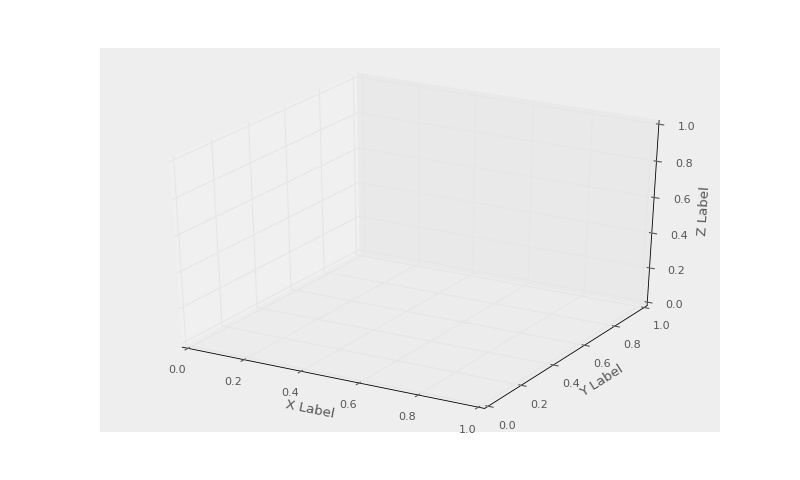

In [13]:
    # These lines are comments
    # Initial setup from an online python notebook tutorial is below. 
    # Note the first line "%matplotlib inline" this is how the tutorial has it.
    # Two solutions 1. use: "%matplotlib notebook" graphs appear dynamic in the notebook.
    #               2. use: "%matplotlib" (only) graphs appear dynamic in separate window. 
    #    ( 2. is the best solution for detailed graphs/plots. )

    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    pd.set_option('max_columns',30)
    pd.set_option('max_rows',10)


    # What follows is a copy of the 3D plot example code.
    # Data is randomly generated so there is no external data import.

    def randrange(n, vmin, vmax):
        return (vmax-vmin)*np.random.rand(n) + vmin

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = 100
    for c, zl, zh in [('r', -60, -25), ('b', -30, -5)]:
        xs = randrange(n, 23, 50)
        ys = randrange(n, 0, 100)
        zs = randrange(n, zl, zh)
        ?ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()